In [3]:
#%matplotlib widget 
import sys
import numpy as np

from pyDFCSR_2D import CSR2D
import matplotlib.pyplot as plt
from matplotlib import cm
import h5py
from pyDFCSR_2D.tools import plot_surface

## Run DFCSR

In [4]:
testCSR = CSR2D(input_file= 'input/dipole_facet_config.yaml')

start reinterpolation. number of slice 1


In [5]:
testCSR.run()

Starting the DFCSR run
Wakes written to  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output\facet_obed-2024-06-17T21_03_22-07_00-wakes.h5
Finish step 1, s = 0.05,  in 3.240478515625 seconds
Finish step 2, s = 0.1,  in 2.6304574012756348 seconds
Finish step 3, s = 0.15000000000000002,  in 2.8932414054870605 seconds
Finish step 4, s = 0.2,  in 2.8528056144714355 seconds
Finish step 5, s = 0.25,  in 2.884451389312744 seconds
Finish step 6, s = 0.3,  in 2.660743474960327 seconds
Finish step 7, s = 0.35,  in 2.553223133087158 seconds
Finish step 8, s = 0.39999999999999997,  in 2.6740455627441406 seconds
Finish step 9, s = 0.44999999999999996,  in 2.5559630393981934 seconds
Finish step 10, s = 0.49999999999999994,  in 3.0045957565307617 seconds
Finish step 11, s = 0.5499999999999999,  in 3.100257158279419 seconds
Finish step 12, s = 0.6,  in 3.1203603744506836 seconds
Finish step 13, s = 0.65,  in 3.1884143352508545 seconds
Finish step 14, s = 0.7000000000000001,  in 3.205240249633789 

## Parallel Run with MPI

In [4]:
# input yaml file in "./input/dipole_config.yaml"
!mpirun -n 4 python  -m pyDFCSR_mpi_run ./input/chicane_config.yaml

'mpirun' is not recognized as an internal or external command,
operable program or batch file.


## Plot output

In [6]:
from pyDFCSR_2D.postprocessor import DFCSR_postprocessor

DFplot = DFCSR_postprocessor(run_name = 'facet_obed-2024-06-17T21_03_22-07_00',
                             work_dir = './output')

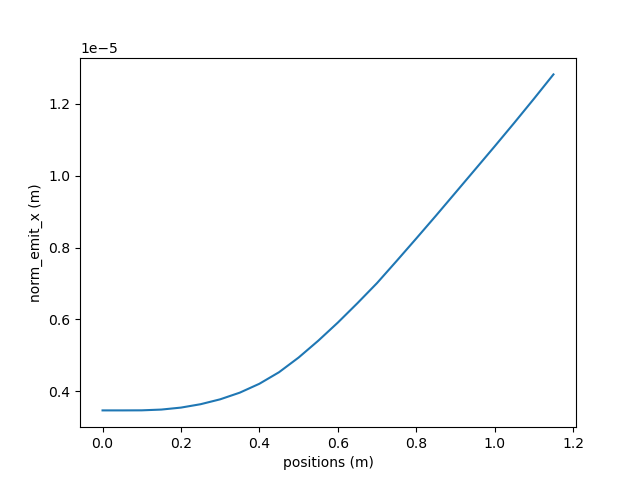

In [7]:
# Plot beam size along the lattice
x, y = DFplot.get_statistics(key = 'norm_emit_x', show_plot = True)


plot longitudinal wakes at nearest point s  = 0.2 m, step count 4
ebeam energy 9856000000.0


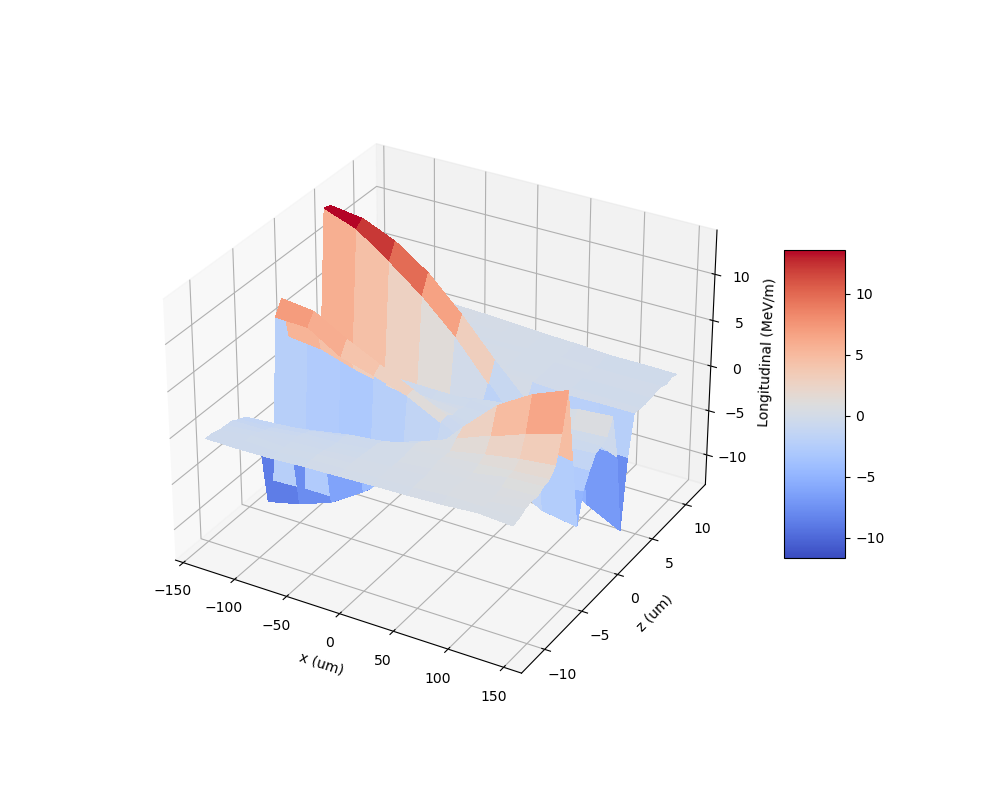

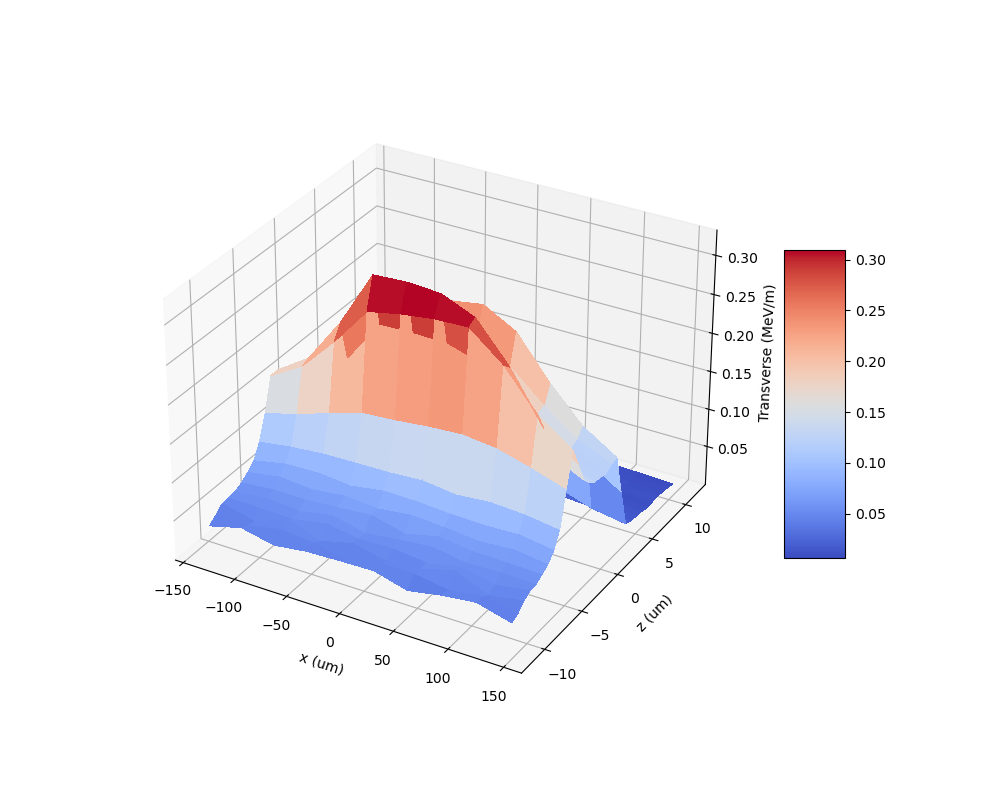

In [8]:
x_grids, z_grids, xkicks, dE_dct = DFplot.get_wakes(s =0.2, show_plot = True)

In [10]:
from pmd_beamphysics.plot import density_and_slice_plot
pg  = DFplot.get_particles()
pg.plot('x', 'px')
